 **hints**

_What's about features with diffetrents scales. Such us , Age or GPA Vs Salary_

# Normalization

- Normalization makes training less sensitive to the scale of features, so we can better solve for coefficients.

- Standardization is another scaling technique where the values are centered around the mean with a unit standard deviation. This means that the mean of the attribute becomes zero and the resultant distribution has a unit standard deviation.- .

- Standardizing tends to make the training process well behaved because the numerical condition of the optimization problems is improved.

In [12]:
import numpy as np
import pandas as pd

In [13]:
pwd

'/content'

In [14]:
np.random.seed(1)
df = pd.DataFrame({
    'x1': np.random.normal(0, 2, 10000),
    'x2': np.random.normal(5, 3, 10000),
    'x3': np.random.normal(-5, 5, 10000)
})

In [15]:
df.head()

,x1,x2,x3
0,3.248691,4.632578,-14.657819
1,-1.223513,5.684509,-5.802131
2,-1.056344,3.943085,-9.161098
3,-2.145937,2.508340,-6.030558
4,1.730815,4.216731,0.131275


In [16]:
from sklearn.preprocessing import StandardScaler

scaled_df = pd.DataFrame(
    StandardScaler().fit_transform(df),
    columns=['x1', 'x2', 'x3'])



In [17]:
scaled_df.head()

,x1,x2,x3
0,1.616535,-0.131753,-1.924757
1,-0.622285,0.218475,-0.146416
2,-0.538598,-0.361311,-0.820942
3,-1.084057,-0.838991,-0.192287
4,0.856675,-0.270204,1.045092


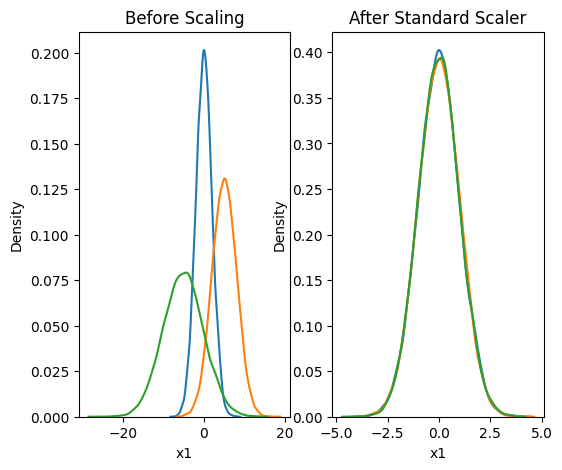

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(ncols=2, figsize=(6, 5))

ax[0].set_title('Before Scaling')
sns.kdeplot(df['x1'], ax=ax[0])
sns.kdeplot(df['x2'], ax=ax[0])
sns.kdeplot(df['x3'], ax=ax[0])


ax[1].set_title('After Standard Scaler')
sns.kdeplot(scaled_df['x1'], ax=ax[1])
sns.kdeplot(scaled_df['x2'], ax=ax[1])
sns.kdeplot(scaled_df['x3'], ax=ax[1])
plt.show()

# california_housing

In [85]:
import numpy as np
import pandas as pd
# Get dataset
url="https://raw.githubusercontent.com/DatascienceBH/ML-Course/ML-github/data/california_housing_train.csv"

df = pd.read_csv(url)


In [86]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [87]:
df.median_income.agg(["min", "max"])

,median_income
min,0.4999
max,15.0001


In [88]:
df.total_bedrooms.agg(["min", "max"])

,total_bedrooms
min,1.0
max,6445.0


In [89]:
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline


In [90]:
df.keys()

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')

In [91]:
df.housing_median_age.agg(["min","max"])

,housing_median_age
min,1.0
max,52.0


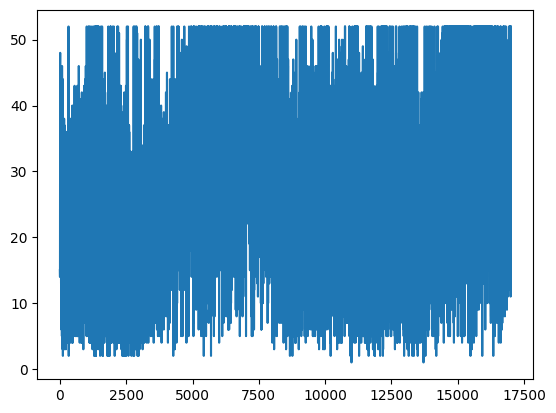

In [92]:
plt.plot(df.housing_median_age)


Text(0.5, 1.0, ' Median House Value')

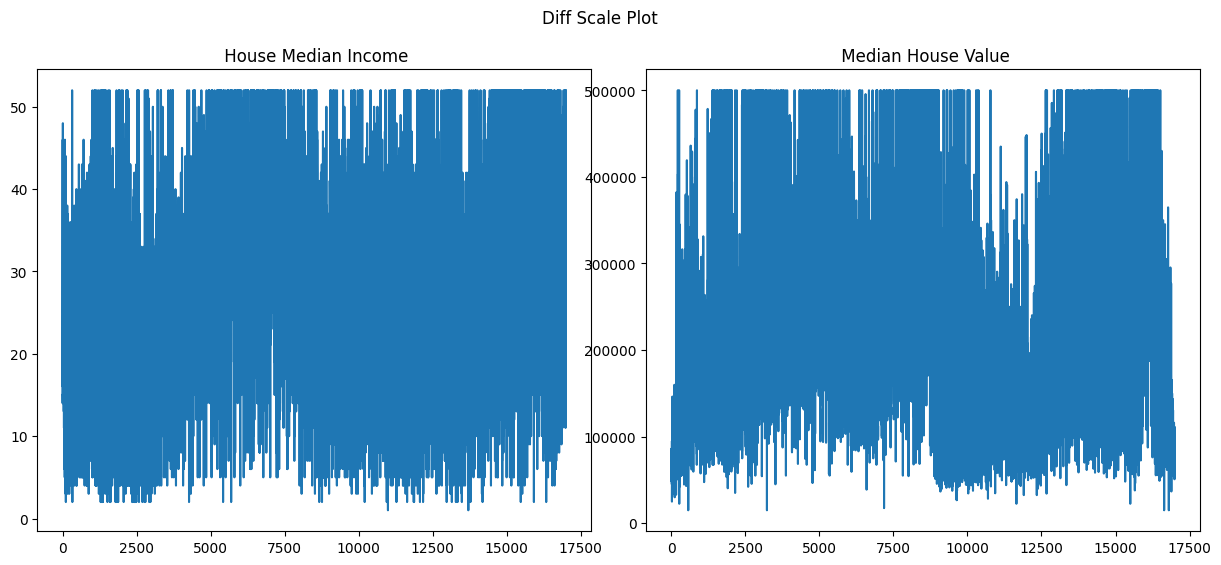

In [93]:
# possibilité de dimenssionner le gap
fig, ax = plt.subplots(1,2, figsize=(15, 6), sharex=True,  gridspec_kw={'wspace': .1})
fig.suptitle('Diff Scale Plot')
ax[0].plot(df.housing_median_age)
ax[0].set_title(" House Median Income")
ax[1].plot(df.median_house_value)
ax[1].set_title(" Median House Value")


In [94]:
df.median_income.agg(["min", "max"])

,median_income
min,0.4999
max,15.0001


<Axes: xlabel='median_income', ylabel='Density'>

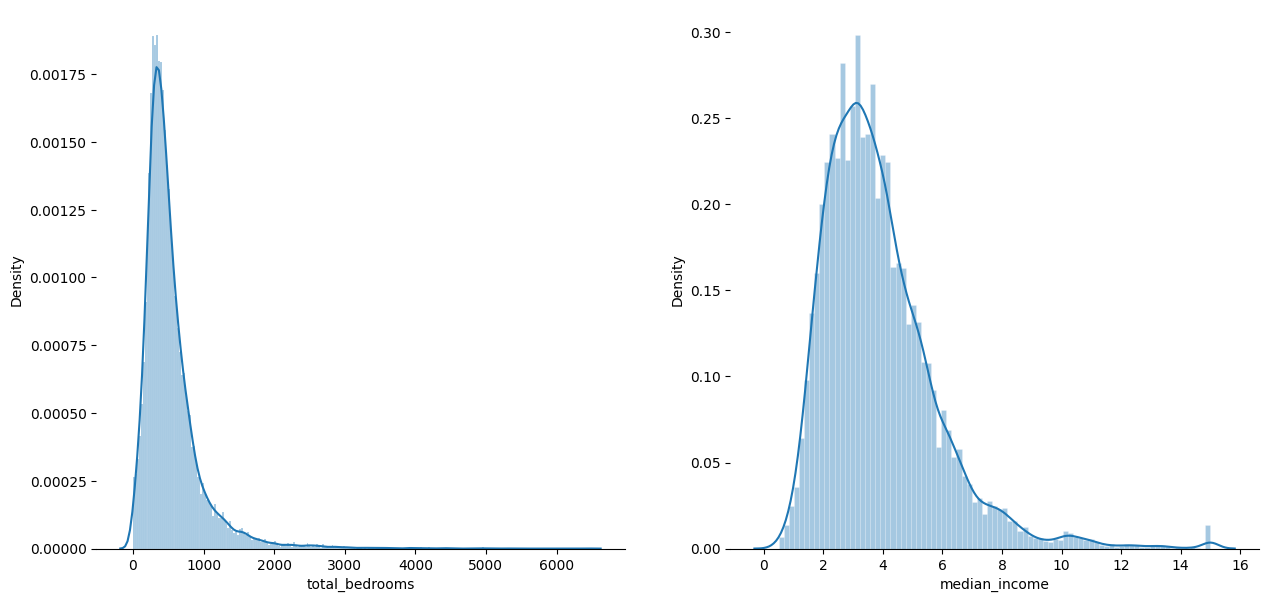

In [95]:


# No need for plt.subplots() with displot – it handles the figure creation
# Use 'col' to create separate plots side-by-side.  'kind="kde"' for KDE only.
# 'fill=True' replaces 'shade=True'
# Create subplots (as you had before)

f, ax = plt.subplots(1, 2, figsize=(15, 7), sharex=False)
sns.despine(left=True)
# First subplot: total_bedrooms
# sns.histplot(df.total_bedrooms, hist=True, color="g", kde_kws={"shade": True}, ax=ax[0])
# sns.histplot(df.median_income, hist=True, color="r", kde_kws={"shade": True}, ax=ax[1])
sns.histplot(
    df["total_bedrooms"], kde=True,
    stat="density", kde_kws={'cut':3},
    alpha=.4, edgecolor=(1, 1, 1, .4),ax=ax[0]
)
sns.histplot(
    df["median_income"], kde=True,
    stat="density",  kde_kws={'cut':3},
    alpha=.4, edgecolor=(1, 1, 1, .4),ax=ax[1]
)


In [96]:
# remove xkcd
# plt.rcdefaults()



# Normalized plot


In [97]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

scaler.fit_transform(df[["total_bedrooms"]])

array([[ 1.76420407],
       [ 3.23044127],
       [-0.86695622],
       ...,
       [-0.01995512],
       [ 0.02986848],
       [-0.56801465]])

- Standardizing tends to make the training process well behaved because the numerical condition of the optimization problems is improved.

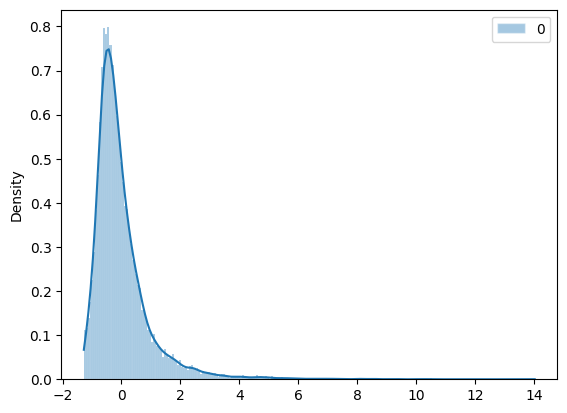

In [98]:
# sns.distplot(scaler.fit_transform(df[["total_bedrooms"]]))

sns.histplot(
    scaler.fit_transform(df[["total_bedrooms"]]), kde=True,
    stat="density",
    alpha=.4, edgecolor=(1, 1, 1, .4)
)
plt.show()

#   Normalization:  California Housing

In [99]:
from sklearn.preprocessing import (minmax_scale ,
                                   MaxAbsScaler ,
                                   StandardScaler ,
                                   RobustScaler,
                                   Normalizer,
                                   QuantileTransformer ,
                                   PowerTransformer )
from sklearn.datasets import fetch_california_housing

In [100]:
X, y =fetch_california_housing(return_X_y=True)

In [101]:
X[1:3]

array([[ 8.30140000e+00,  2.10000000e+01,  6.23813708e+00,
         9.71880492e-01,  2.40100000e+03,  2.10984183e+00,
         3.78600000e+01, -1.22220000e+02],
       [ 7.25740000e+00,  5.20000000e+01,  8.28813559e+00,
         1.07344633e+00,  4.96000000e+02,  2.80225989e+00,
         3.78500000e+01, -1.22240000e+02]])

In [102]:
y[1:3]

array([3.585, 3.521])

In [103]:
fetch_california_housing().keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [104]:
print(fetch_california_housing().DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [105]:
fetch_california_housing().feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [106]:
df= pd.DataFrame(fetch_california_housing().data,
             columns=fetch_california_housing().feature_names)
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [107]:
df.keys()

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude'],
      dtype='object')

In [108]:
df.MedInc.agg(["min", "max"])

,MedInc
min,0.4999
max,15.0001


![](https://gisgeography.com/wp-content/uploads/2015/09/Horizontal-Datums-620x322.png)

In [109]:
df.Latitude.agg(["min", "max"])

,Latitude
min,32.54
max,41.95


In [110]:
df.Longitude.agg(["min", "max"])

,Longitude
min,-124.35
max,-114.31


In [111]:
df.Population.agg(["min", "max"])

,Population
min,3.0
max,35682.0


In [112]:
df.MedInc.agg(["min", "max"])

,MedInc
min,0.4999
max,15.0001


In [113]:
# remove xkcd
# plt.rcdefaults()

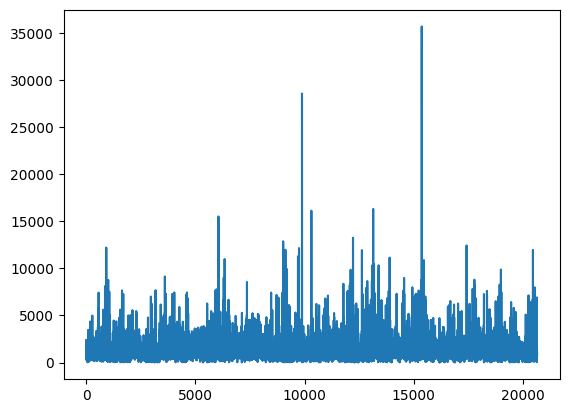

In [114]:
plt.plot(df.Population)

In [115]:
def plot_N(A,t1,  B, t2):
    fig, ax = plt.subplots(1,2, figsize=(15, 6), sharex=True,  gridspec_kw={'wspace': .1})
    fig.suptitle('Diff Scale Plot')
    ax[0].plot(A)
    ax[0].set_title(" Zone Population")
    ax[1].plot(B)
    ax[1].set_title(" Median Income Value")

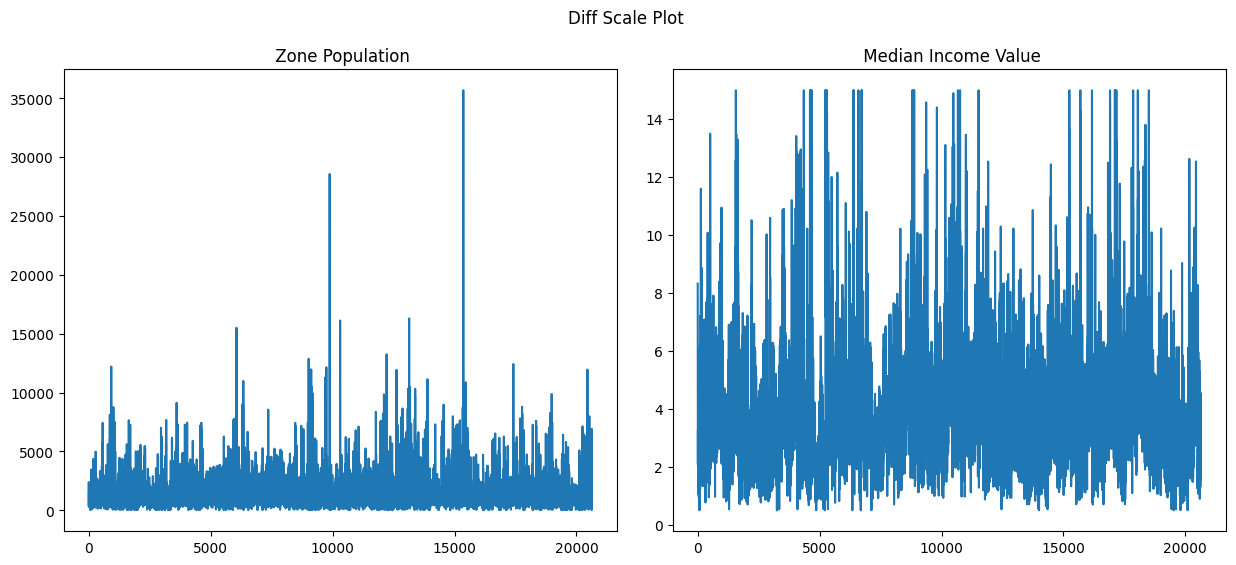

In [116]:
plot_N(df.Population,"Zone Population",  df.MedInc, "Median Income Value")

In [117]:
df.shape

(20640, 8)

<Axes: xlabel='HouseAge', ylabel='Density'>

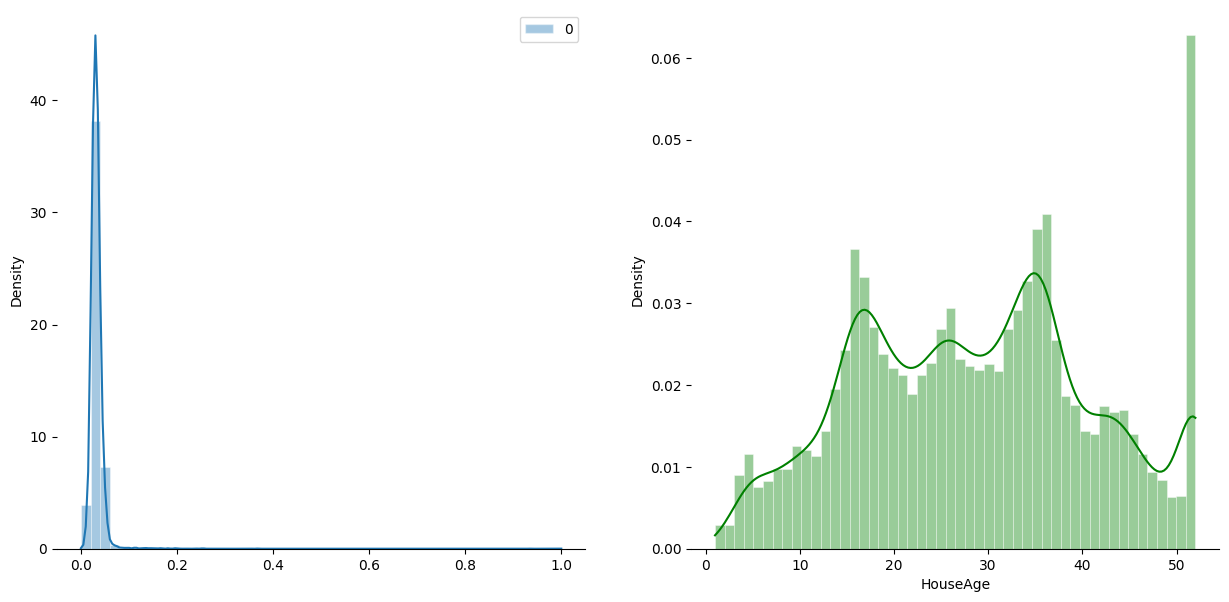

In [122]:
# remove xkcd
plt.rcdefaults()

from sklearn.preprocessing import MinMaxScaler

f, ax = plt.subplots(1, 2, figsize=(15, 7), sharex=False)
sns.despine(left=True)

# Plot a filled kernel density estimate


sns.histplot(
    MinMaxScaler().fit_transform(df[["AveRooms"]]), kde=True,
    stat="density",  color="r",
    alpha=.4, edgecolor=(1, 1, 1, .4), bins=50 ,  ax= ax[0]
)
# use sns to graph the density graph of df.HouseAge
sns.histplot(
    df.HouseAge, kde=True, color="g",
    stat="density",
    alpha=.4, edgecolor=(1, 1, 1, .4), ax= ax[1], bins= 50
)


In [123]:
df.keys()

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude'],
      dtype='object')

In [124]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [125]:
df[["Longitude", "Latitude"]].agg(["min", "max"])

,Longitude,Latitude
min,-124.35,32.54
max,-114.31,41.95


In [126]:
np.linspace(32, 42, 5)

array([32. , 34.5, 37. , 39.5, 42. ])

In [128]:
df.shape

(20640, 9)

In [127]:

# we Suppose that  the lattitude is representative of the house value
#add a new column category : Position_Cat
category = pd.cut(df.Latitude,bins=np.linspace(32, 42, 5),
                  labels=['A','B','C','D'])
df.insert(6,'Cat_House',category)

In [ ]:
df.sample(5, random_state=42)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Cat_House,Latitude,Longitude
20046,1.6812,25.0,4.192201,1.022284,1392.0,3.877437,B,36.06,-119.01
3024,2.5313,30.0,5.039384,1.193493,1565.0,2.679795,B,35.14,-119.46
15663,3.4801,52.0,3.977155,1.185877,1310.0,1.360332,C,37.80,-122.44
20484,5.7376,17.0,6.163636,1.020202,1705.0,3.444444,A,34.28,-118.72
9814,3.7250,34.0,5.492991,1.028037,1063.0,2.483645,B,36.62,-121.93


In [ ]:
y.shape

(20640,)